In [29]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import scipy.sparse as sparse

In [30]:
nside = 128
lmax = 3*nside-1
npix = 12 * nside **2

In [3]:
# ! python /scratch/yuyang/toast/src/toast/scripts/toast_obsmatrix_combine.py obsmat_nside64/out/0/filterbin_obs_matrix
# ! mv obsmat_nside64/out/0/filterbin_obs_matrix.npz obsmat_nside64/obsmat.npz

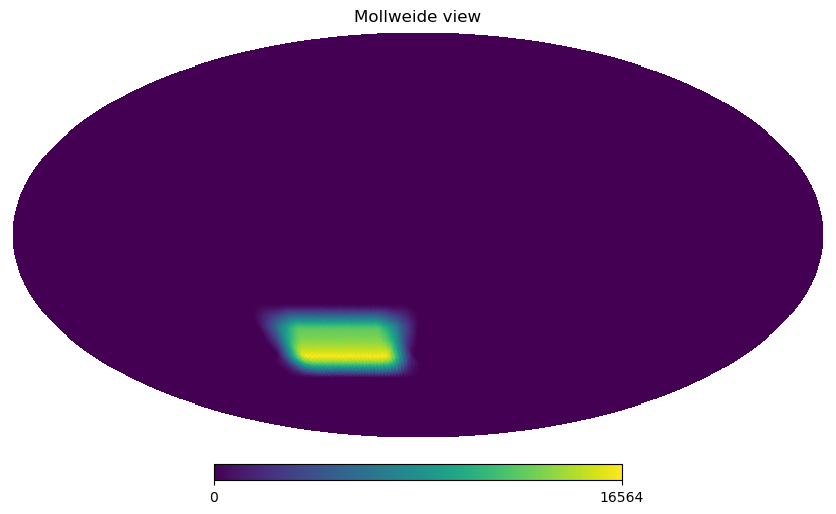

In [22]:
hits = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_hits.fits')
hp.mollview(hits)

In [31]:
m_filtered = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_filtered_map.fits', field=None)
m_unfiltered = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_unfiltered_map.fits', field=None)

In [37]:
qq, qu, uu = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_invcov.fits', field=[3,4,5])
tr = qq + uu
det = qq * uu - qu * qu
weight = (tr - np.sqrt(tr ** 2 - 4 * det) ) 

In [38]:
nw_filtered = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_noiseweighted_filtered_map.fits', field=None)

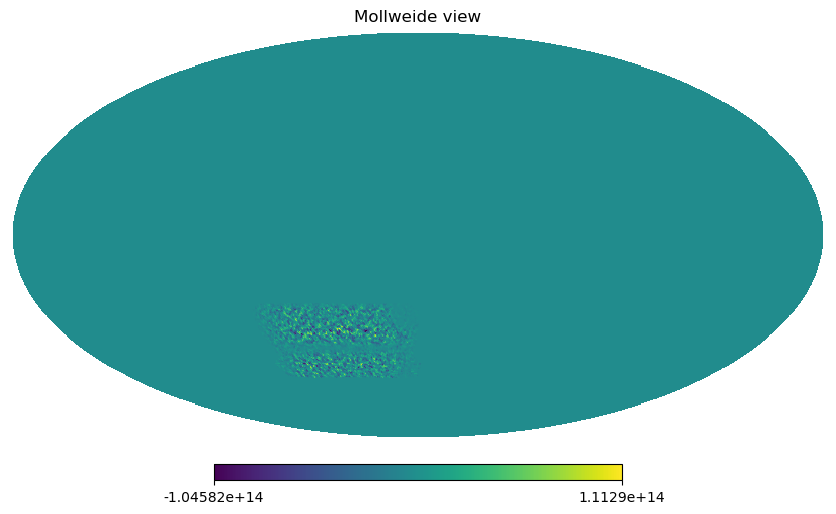

In [41]:
hp.mollview(weight * m_filtered[0] - nw_filtered[0])

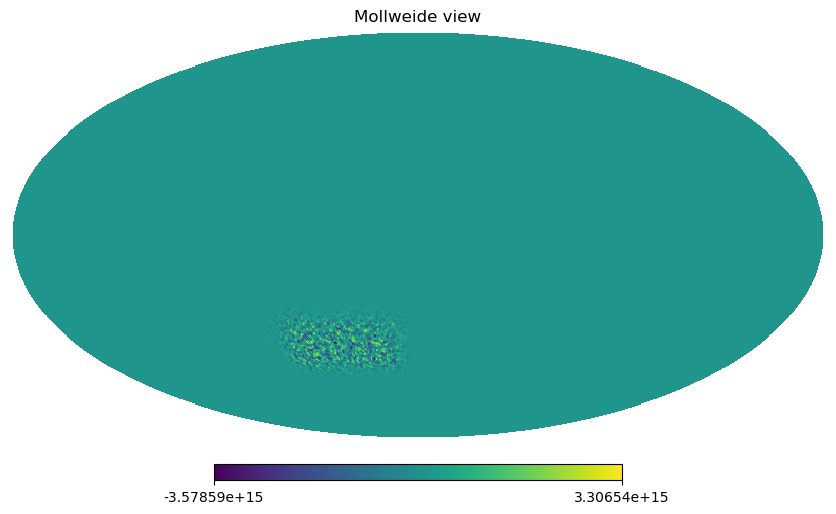

In [40]:
hp.mollview(nw_filtered[0])

In [5]:
# obsmat = sparse.load_npz(f'obsmat_nside{nside}/obsmat.npz')
# obsmat

<147456x147456 sparse matrix of type '<class 'numpy.float64'>'
	with 11267881 stored elements in Compressed Sparse Row format>

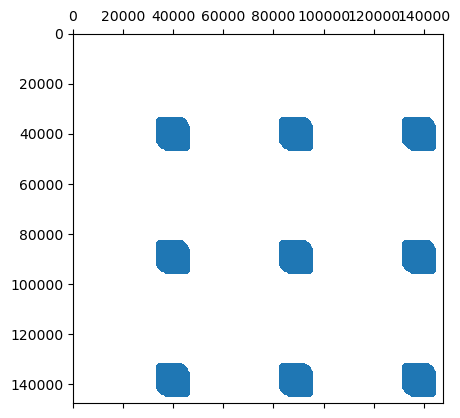

In [6]:
# plt.spy(obsmat, marker='o', markersize=5)

In [7]:
# m_filtered = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_filtered_map.fits', field=None)
# m_unfiltered = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_unfiltered_map.fits', field=None)

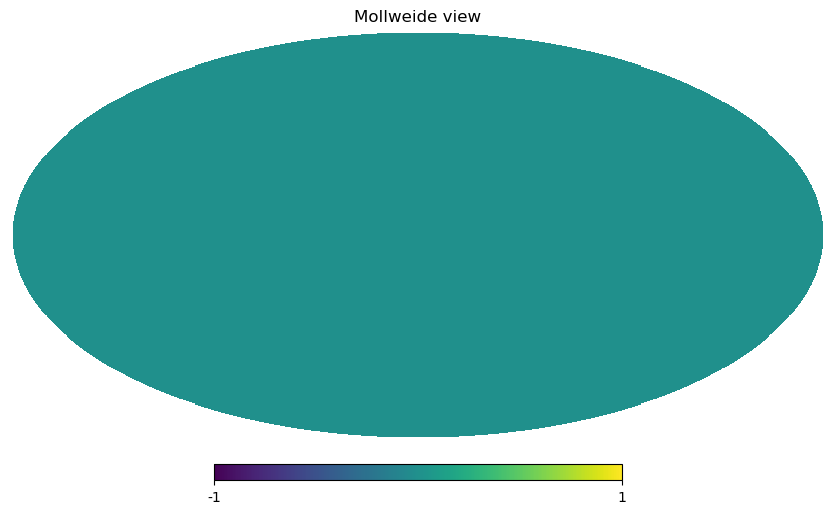

In [8]:
# hp.mollview(m_filtered[0])

In [9]:
# observed_map = obsmat.dot(m_unfiltered.flatten()).reshape(3, npix)

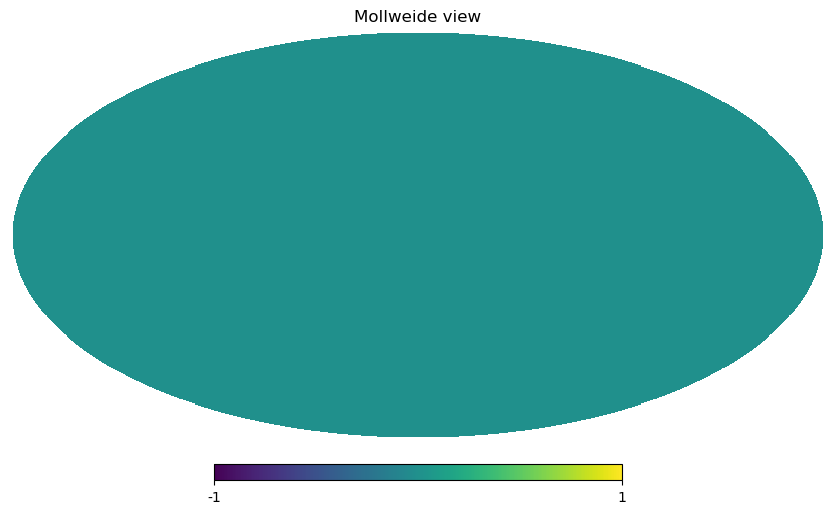

In [10]:
# hp.mollview(observed_map[0])